# Exercise 02: Data Normalization

In this exercise, you will explore the effects of data normalization (shifting and scaling).

In [1]:
import sys
!{sys.executable} -m pip install -U pip
!{sys.executable} -m pip install -U scikit-learn matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 70.7 MB/s eta 0:00:000m eta 0:00:0101
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 67.8 MB/s eta 0:00:00m eta 0:00:010:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.4.0
    Uninstalling scikit-learn-1.4.0:
      Successfully uninstalled scikit-learn-1.4.0
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.8.2
    Uninstalling matplotlib-3.8.2:
      Successfully uninstalled matplotlib-3.8.2


The following function generates two datasets.  You don't need to know how it works...

In [2]:
import numpy as np

def generate_data ():
    N_samples = 100
    Sigma = [
        [ 1.0, 0.9 ],
        [ 0.9, 1.0 ]
    ]
    
    X_1 = np.random.default_rng().multivariate_normal([0.0, 0.0], Sigma, N_samples)
    X_2 = np.copy(X_1);
    X_2[:,0] = X_2[:,0]*1000 + 3000;
    X_2[:,1] = X_2[:,1] + 50;

    return (X_1, X_2)

X_1, X_2 = generate_data()

Let's take a look at a scatterplot of the first dataset.

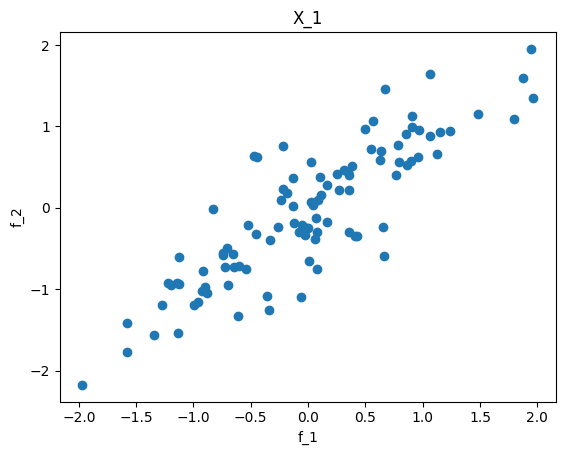

In [4]:
import matplotlib.pyplot as plt

ax_1 = plt.gca()
plt.scatter(X_1[:,0], X_1[:,1]);
plt.title('X_1')
ax_1.set_xlabel('f_1')
ax_1.set_ylabel('f_2');

**Are these two features highly correlated?**

Yes, the higher f_1 is the higher f_2 goes.

Now let's take a look at the second dataset.

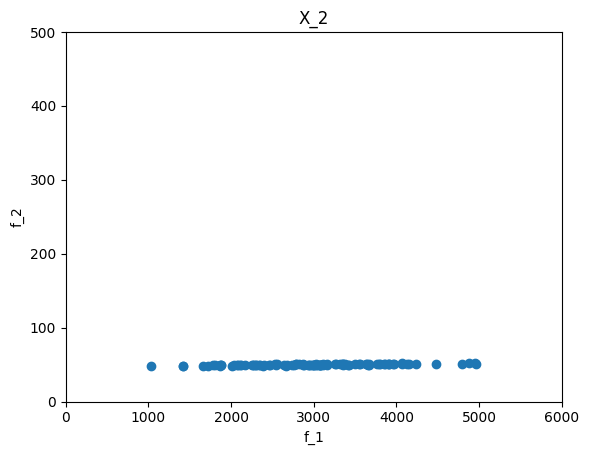

In [5]:
ax_2 = plt.gca()
plt.scatter(X_2[:,0], X_2[:,1]);
plt.title('X_2')
ax_2.set_ylim(0, 500)
ax_2.set_xlim(0, 6000)
ax_2.set_xlabel('f_1')
ax_2.set_ylabel('f_2');

**Are these features highly correlated?**

No, no matter how high f_1 goes f_2 does not grow. 

Let's see if seaborn's `pairplot` agrees.

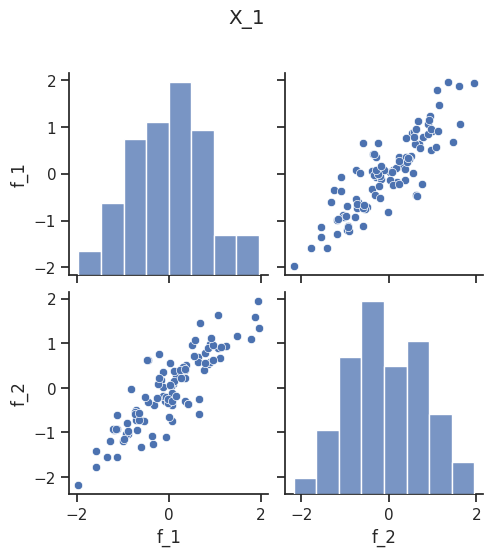

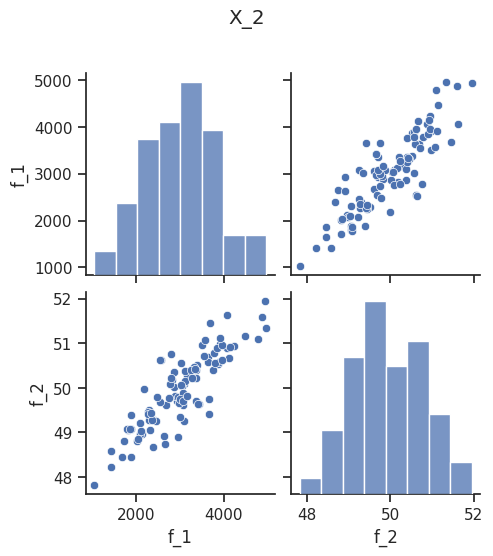

In [7]:
import seaborn as sns
import pandas as pd

sns.set(style="ticks", color_codes=True)

df_1 = pd.DataFrame(
    data=X_1,
    columns=['f_1', 'f_2']
)

df_2 = pd.DataFrame(
    data=X_2,
    columns=['f_1', 'f_2']
)

g_1 = sns.pairplot(df_1)
g_1.fig.suptitle('X_1', y=1.1);

g_2 = sns.pairplot(df_2)
g_2.fig.suptitle('X_2', y=1.1);

**According to the plots above, are the features strongly correlated in one dataset or both?**

Looks like both datasets are strongly correlated according to seaborn.

**Explain why the original plots didn't show all of the correlations.**

Data normalization. Different scaling may have been used with seaborn's pairplot function.